In [16]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [17]:
base_dir = 'C:/00000000000000DEEP/0tamrin/تمرین سری ۲/تمرین_سری_۲_سوال_۲_ترم_تابستان_۹۹/cat-nonCat/dataset'

In [18]:
train_dir = os.path.join(base_dir, 'train')

In [19]:
test_dir = os.path.join(base_dir, 'test')

In [20]:
train_cat_dir = os.path.join(train_dir, 'cat')

In [21]:
train_non_cat_dir = os.path.join(train_dir, 'non-cat')

In [22]:
test_cat_dir = os.path.join(test_dir, 'cat')

In [23]:
test_non_cat_dir = os.path.join(test_dir, 'non-cat')

In [24]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training non-cat images:', len(os.listdir(train_non_cat_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test non-cat images:', len(os.listdir(test_non_cat_dir)))

total training cat images: 72
total training non-cat images: 137
total test cat images: 33
total test non-cat images: 17


In [25]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 209 images belonging to 2 classes.


In [29]:
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 50 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=7,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 0.6649 - acc: 0.6507 - val_loss: 0.8121 - val_acc: 0.3400
Epoch 2/100
7/7 [==============================] - 3s 401ms/step - loss: 0.6428 - acc: 0.6555 - val_loss: 0.8363 - val_acc: 0.3400
Epoch 3/100
7/7 [==============================] - 3s 425ms/step - loss: 0.6378 - acc: 0.6555 - val_loss: 0.8896 - val_acc: 0.3400
Epoch 4/100
7/7 [==============================] - 4s 506ms/step - loss: 0.6314 - acc: 0.6555 - val_loss: 0.8527 - val_acc: 0.3400
Epoch 5/100
7/7 [==============================] - 4s 548ms/step - loss: 0.6294 - acc: 0.6555 - val_loss: 0.8759 - val_acc: 0.3400
Epoch 6/100
7/7 [==============================] - 3s 413ms/step - loss: 0.6179 - acc: 0.6555 - val_loss: 0.8906 - val_acc: 0.3400
Epoch 7/100
7/7 [==============================] - 3s 364ms/step - loss: 0.6151 - acc: 0.6555 - val_loss: 0.9885 - val_acc: 0.3400
Epoch 8/10

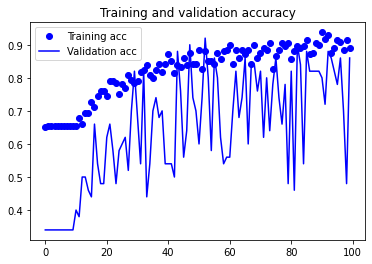

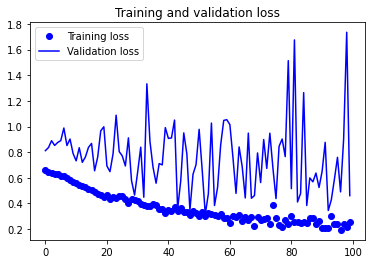

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()